# Import thư viện

In [ ]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import cv2
from math import *

import sklearn.model_selection
from sklearn.metrics import *

# Tiền xử lý dữ liệu

In [ ]:
labels = ['good', 'bad']

In [ ]:
ImageGen = tf.keras.preprocessing.image.ImageDataGenerator()

In [ ]:
img_train = ImageGen.flow_from_directory('/kaggle/input/goodbadguyfaceimg/train', target_size=(224, 224), batch_size = 100, class_mode = 'binary')

Found 11220 images belonging to 2 classes.


In [ ]:
img_valid = ImageGen.flow_from_directory('/kaggle/input/goodbadguyfaceimg/valid', target_size=(224, 224), batch_size = 100, class_mode = 'binary')

Found 600 images belonging to 2 classes.


In [ ]:
img_test = ImageGen.flow_from_directory('/kaggle/input/goodbadguyfaceimg/test', target_size=(224, 224), batch_size = 100, class_mode = 'binary', shuffle = False)

Found 600 images belonging to 2 classes.


# Xây dựng model

Hàm xây model từ model pre train EfficientNetV2 B0 của TF

In [ ]:
def build_model():
  inputs = tf.keras.layers.Input((224,224,3),name = 'input')

  model = tf.keras.applications.EfficientNetV2B0(include_top=False, weights="imagenet",input_tensor = inputs)
  x = model.output
  x = tf.keras.layers.GlobalAveragePooling2D(name = 'pooling')(x)
  outputs = tf.keras.layers.Dense(1,activation = 'sigmoid',name = 'outputs')(x)

  model = tf.keras.Model(inputs=inputs , outputs =outputs)

  return model

Freeze 70% số layers đầu của model pretrain

In [ ]:
def freeze_model_layers(model):
    l = len(model.layers)
    for i,layer in enumerate(model.layers):
        if i > 0.7* l:
            break
        layer.trainable = False

    return model

Chạy để build model

In [ ]:
model = build_model()
model = freeze_model_layers(model)

24274472/24274472 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input[0][0]']                  
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  0           ['rescaling[0][0]']              
                                                                                                  
 stem_conv (Conv2D)          

# Train model

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = ['binary_accuracy'])

In [ ]:
early_stop_callbacks = tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True)
hist = model.fit(img_train, validation_data = img_valid, epochs = 30)

Epoch 1/30
113/113 [==============================] - 43s 383ms/step - loss: 0.0030 - binary_accuracy: 0.9988 - val_loss: 0.0429 - val_binary_accuracy: 0.9883
Epoch 2/30
113/113 [==============================] - 43s 376ms/step - loss: 0.0072 - binary_accuracy: 0.9979 - val_loss: 0.0586 - val_binary_accuracy: 0.9833
Epoch 3/30
113/113 [==============================] - 42s 368ms/step - loss: 0.0044 - binary_accuracy: 0.9986 - val_loss: 0.0547 - val_binary_accuracy: 0.9833
Epoch 4/30
113/113 [==============================] - 42s 372ms/step - loss: 0.0036 - binary_accuracy: 0.9988 - val_loss: 0.0664 - val_binary_accuracy: 0.9850
Epoch 5/30
113/113 [==============================] - 41s 366ms/step - loss: 0.0018 - binary_accuracy: 0.9994 - val_loss: 0.0806 - val_binary_accuracy: 0.9800
Epoch 6/30
113/113 [==============================] - 41s 361ms/step - loss: 0.0041 - binary_accuracy: 0.9990 - val_loss: 0.0541 - val_binary_accuracy: 0.9833
Epoch 7/30
113/113 [==========================

# Lưu mô hình

In [ ]:
model.save_weights("model_weight.h5")

# Đánh giá mô hình

In [ ]:
y_pred = model.predict(img_test)

6/6 [==============================] - 2s 397ms/step


In [ ]:
y_true = img_test.labels
y_true.reshape(-1, 1)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [ ]:
y_pred = np.where(y_pred > 0.5, 1,0)
y_pred

array([[1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
    

In [ ]:
model.evaluate(img_train)

113/113 [==============================] - 40s 357ms/step - loss: 1.5747e-04 - binary_accuracy: 1.0000


[0.0001574676134623587, 1.0]

In [ ]:
model.evaluate(img_valid)

6/6 [==============================] - 2s 377ms/step - loss: 0.0649 - binary_accuracy: 0.9867


[0.06489194929599762, 0.9866666793823242]

In [ ]:
model.evaluate(img_test)

6/6 [==============================] - 2s 318ms/step - loss: 0.0675 - binary_accuracy: 0.9833


[0.0674629732966423, 0.9833333492279053]

In [ ]:
metrics_acc = tf.keras.metrics.Accuracy()
metrics_acc.update_state(y_true,y_pred)
metrics_acc.result().numpy()

0.98333335

In [ ]:
confusion_matrix(y_true,y_pred)

array([[290,  10],
       [  0, 300]])

In [ ]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       300
           1       0.97      1.00      0.98       300

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600



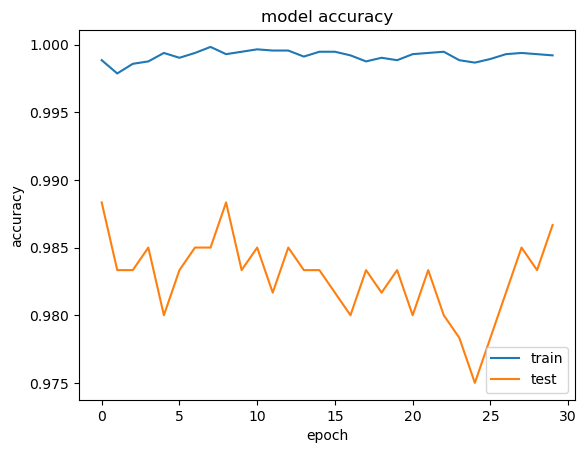

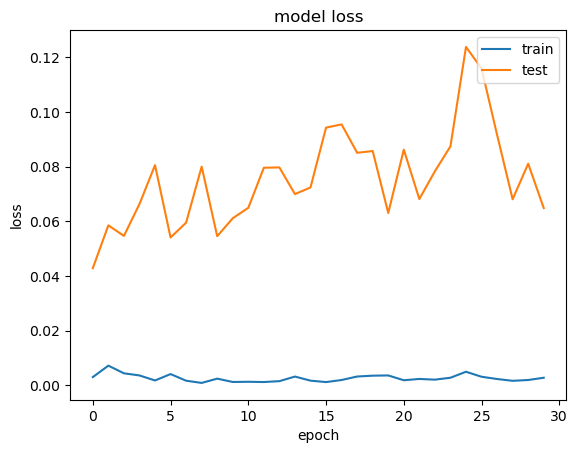

In [ ]:
# summarize history for accuracy
plt.plot(hist.history['binary_accuracy'])
plt.plot(hist.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()